<a href="https://colab.research.google.com/github/muxeres/BOOTCAMP/blob/master/projetoLojaComputadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files
import pandas as pd

# Importando os dados CSV combinados
combined_df = pd.read_excel('Computer_store_Final.xlsx')
# Salvando o DataFrame combinado em um arquivo CSV
combined_df.to_csv('loja_computadores.csv', index=False)

In [71]:
# Exibindo os nomes das colunas para verificação
print("Colunas disponíveis no DataFrame:", combined_df.columns)

Colunas disponíveis no DataFrame: Index(['Code', 'Product', 'Price', 'Manufacturer', 'Cost per Unit',
       'Manufacturer Name', 'Category'],
      dtype='object')


In [72]:
# Exibindo as primeiras linhas dos dados
print(combined_df.head())


   Code      Product  Price  Manufacturer  Cost per Unit Manufacturer Name  \
0     1   Hard drive    240             5            145           Fujitsu   
1     2       Memory    120             6             82        Winchester   
2     3    ZIP drive    150             4             77            Iomega   
3     4  Floppy disk      5             6              3        Winchester   
4     5      Monitor    240             1            159              Sony   

      Category  
0  Periféricos  
1  Periféricos  
2  Periféricos  
3  Periféricos  
4   Accesorios  


In [97]:
# Substitui strings vazias por NaN
combined_df.replace("", np.nan, inplace=True)

# Remove valores NaN do DataFrame
combined_df.dropna(subset=['Manufacturer Name'], inplace=True)

In [98]:

# Tratamento de dados: convertendo preços para centavos
combined_df['Price_cents'] = (combined_df['Price'] * 100).round(2)  #Converte o preço de reais para centavos e armazena na nova coluna 'Price_cents'.



In [74]:
# Média de preços de todos os produtos
average_price = combined_df['Price'].mean()
print(f"Média dos preços de todos os produtos: ${average_price:.2f}")


Média dos preços de todos os produtos: $475.12


In [99]:
# Agrupa os dados pelo nome do fabricante e calcula a média dos preços dos produtos para cada fabricante
manufacturer_avg_price = combined_df.groupby('Manufacturer Name')['Price'].mean().round(2)

# Exibe a média dos preços por fabricante
print(f"Média de preços por fabricante:\n{manufacturer_avg_price}")


Média de preços por fabricante:
Manufacturer Name
AMD                652.33
Acer               368.00
Apple              589.14
Asus               277.00
Cooler Master      460.00
Corsair            779.00
Creative Labs      177.25
Dell               724.00
Fujitsu            240.00
Gigabyte           502.00
HP                 745.00
Hewlett-Packard    145.33
Intel              860.25
Iomega             248.00
Kingston           409.67
Lenovo             361.80
Logitech           734.00
MSI                265.00
NVIDIA             439.67
Razer              371.67
Samsung            553.00
Seagate            206.00
Sony               540.80
Thermaltake        200.33
Toshiba            487.50
Western Digital    694.00
Winchester         332.38
Name: Price, dtype: float64


In [100]:
# Criando uma nova coluna 'Price_in_Reais' para exibir os preços formatados em reais
combined_df['Price_real'] = combined_df['Price'].apply(lambda x: f'R${x:,.2f}')


In [101]:
# Produtos com preço superior a $180
products_above_180 = combined_df[combined_df['Price'] >= 180]
print(f"Produtos com preço >= $180:\n{products_above_180}")

Produtos com preço >= $180:
    Code          Product  Price  Manufacturer  Cost per Unit  \
0      1       Hard drive    240             5            145   
4      5          Monitor    240             1            159   
5      6        DVD drive    180             2            133   
7      8          Printer    270             3            149   
9     10       DVD burner    180             2            158   
..   ...              ...    ...           ...            ...   
75    76           Webcam    427             7             42   
76    77           Webcam    954             7             42   
79    80     External HDD    511            20             73   
80    81  Wireless Router    345            20            101   
81    82     Gaming Chair    346             4            194   

   Manufacturer Name     Category  Price_cents Price_real  
0            Fujitsu  Periféricos        24000   R$240.00  
4               Sony   Accesorios        24000   R$240.00  
5      Crea

In [102]:
# Exibindo todas as linhas dos dados (se o DataFrame não for muito grande)
print("Exibindo todas as linhas do DataFrame:")
print(combined_df)

Exibindo todas as linhas do DataFrame:
    Code          Product  Price  Manufacturer  Cost per Unit  \
0      1       Hard drive    240             5            145   
1      2           Memory    120             6             82   
2      3        ZIP drive    150             4             77   
3      4      Floppy disk      5             6              3   
4      5          Monitor    240             1            159   
..   ...              ...    ...           ...            ...   
77    78  Gaming Keyboard    100             3             63   
78    79          Monitor     78            10            208   
79    80     External HDD    511            20             73   
80    81  Wireless Router    345            20            101   
81    82     Gaming Chair    346             4            194   

   Manufacturer Name     Category  Price_cents Price_real  
0            Fujitsu  Periféricos        24000   R$240.00  
1         Winchester  Periféricos        12000   R$120.00  


In [ ]:
# Função para exibir o número de produtos em vez de porcentagens
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d}".format(absolute)

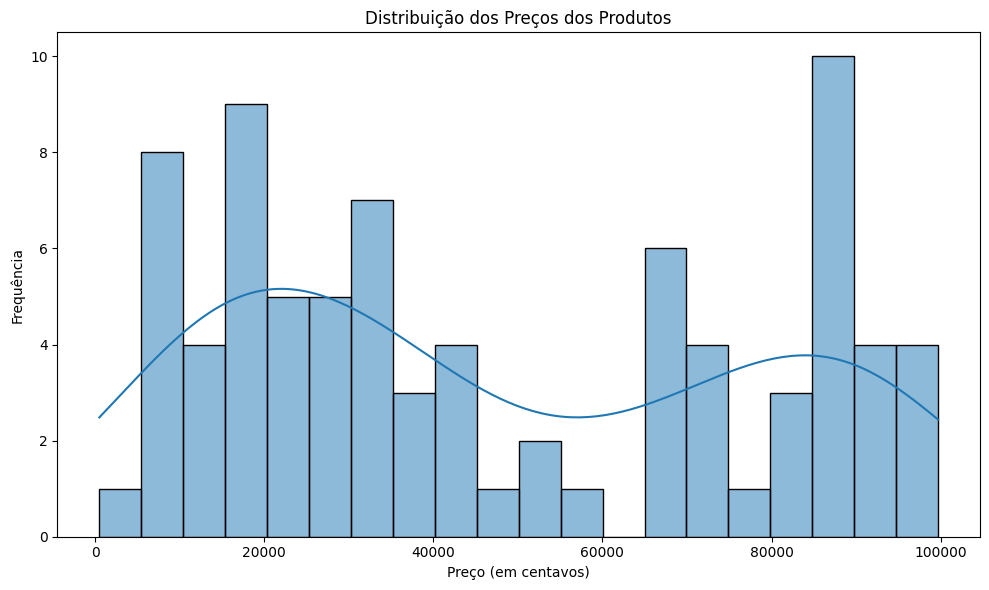

In [103]:
# Exemplo de visualizações

# 1. Distribuição dos preços dos produtos
plt.figure(figsize=(10, 6)) # Define o tamanho da área do gráfico.
sns.histplot(combined_df['Price_cents'], bins=20, kde=True) # Plota um histograma dos preços em centavos com uma curva de densidade.
plt.title('Distribuição dos Preços dos Produtos') #  Define o título do gráfico.
plt.xlabel('Preço (em centavos)')# Define o rótulo do eixo X.
plt.ylabel('Frequência') # Define o rótulo do eixo Y.
# Ajusta o layout do gráfico para evitar sobreposição de elementos
plt.tight_layout()

# Salva o gráfico como uma imagem PNG no diretório /content
plt.savefig('distribuicao_precos.png')

# Fecha o gráfico atual para liberar memória e evitar problemas com gráficos subsequentes
plt.show() # Exibe o gráfico gerado.
plt.close()



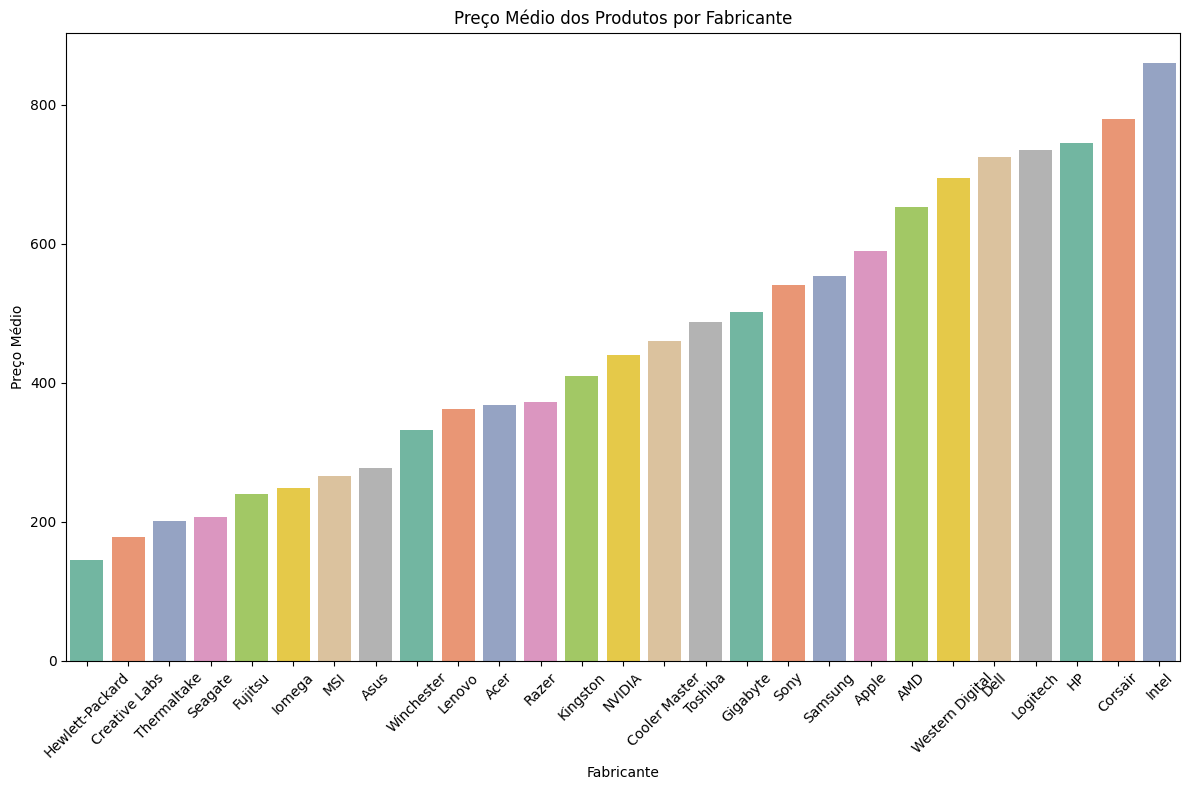

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Preço médio dos produtos por fabricante
plt.figure(figsize=(12, 8))  # Define o tamanho da figura do gráfico (largura de 12 polegadas e altura de 8 polegadas)

# Calcula o preço médio dos produtos para cada fabricante, agrupando por 'Manufacturer Name'
avg_price_per_manufacturer = combined_df.groupby('Manufacturer Name')['Price'].mean().sort_values()

# Plota um gráfico de barras com os preços médios por fabricante
sns.barplot(x=avg_price_per_manufacturer.index,  # Define os rótulos do eixo X como os nomes dos fabricantes
            y=avg_price_per_manufacturer.values,  # Define os valores do eixo Y como os preços médios
            hue=avg_price_per_manufacturer.index ,  # Adiciona uma dimensão adicional para a coloração das barras
            palette=sns.color_palette('Set2', n_colors=len(avg_price_per_manufacturer)))  # Define a paleta de cores

plt.title('Preço Médio dos Produtos por Fabricante')  # Define o título do gráfico
plt.xlabel('Fabricante')  # Define o rótulo do eixo X
plt.ylabel('Preço Médio')  # Define o rótulo do eixo Y
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X em 45 graus para melhor legibilidade
plt.tight_layout()  # Ajusta o layout do gráfico para evitar sobreposição de elementos
plt.savefig('preco_medio_fabricante_barras_colorido.png')  # Salva o gráfico como uma imagem PNG
plt.show()  # Exibe o gráfico gerado
plt.close()  # Fecha o gráfico atual para liberar memória


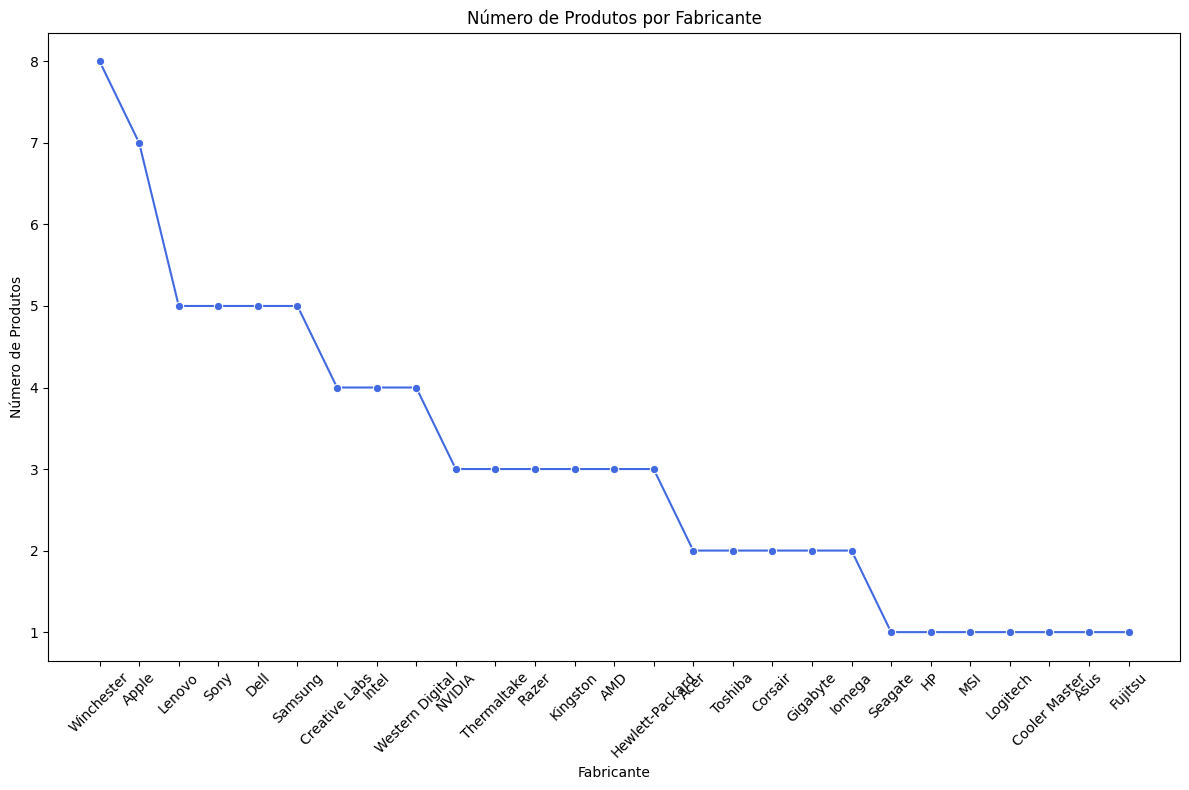

In [105]:
# Número de produtos por fabricante
product_count_per_manufacturer = combined_df['Manufacturer Name'].value_counts()

# Gráfico de linha para o número de produtos por fabricante
plt.figure(figsize=(12, 8))  # Define o tamanho da figura do gráfico

# Plota um gráfico de linha com o número de produtos por fabricante
sns.lineplot(x=product_count_per_manufacturer.index,  # Define os rótulos do eixo X como os nomes dos fabricantes
             y=product_count_per_manufacturer.values,  # Define os valores do eixo Y como a quantidade de produtos
             marker='o',  # Adiciona marcadores aos pontos de dados
             color='royalblue')  # Define a cor da linha

plt.title('Número de Produtos por Fabricante')  # Define o título do gráfico
plt.xlabel('Fabricante')  # Define o rótulo do eixo X
plt.ylabel('Número de Produtos')  # Define o rótulo do eixo Y
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X em 45 graus para melhor legibilidade
plt.tight_layout()  # Ajusta o layout do gráfico para evitar sobreposição de elementos
plt.savefig('numero_produtos_fabricante_linha.png')  # Salva o gráfico como uma imagem PNG
plt.show()  # Exibe o gráfico gerado
plt.close()  # Fecha o gráfico atual para liberar memória


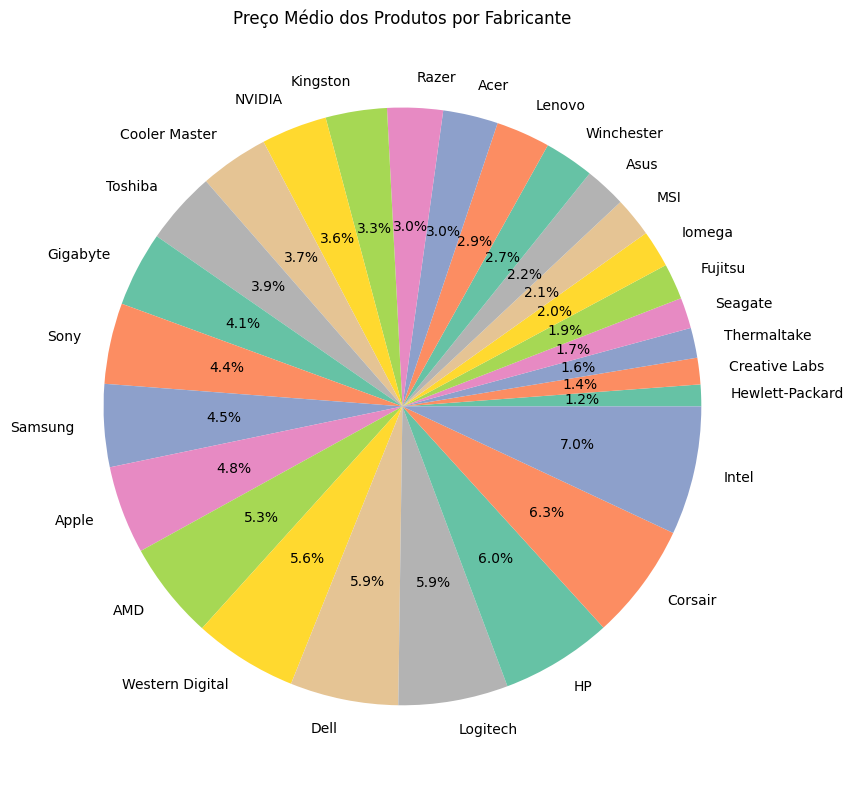

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Preço médio dos produtos por fabricante
plt.figure(figsize=(12, 8))  # Define o tamanho da figura do gráfico (largura de 12 polegadas e altura de 8 polegadas)

# Calcula o preço médio dos produtos para cada fabricante, agrupando por 'Manufacturer Name'
avg_price_per_manufacturer = combined_df.groupby('Manufacturer Name')['Price'].mean().sort_values()

# Plota um gráfico de torta (pizza) com os preços médios por fabricante
plt.pie(avg_price_per_manufacturer,  # Define os valores das fatias da pizza como os preços médios
        labels=avg_price_per_manufacturer.index,  # Define os rótulos das fatias como os nomes dos fabricantes
        autopct='%1.1f%%',  # Adiciona o percentual em cada fatia
        colors=sns.color_palette('Set2', n_colors=len(avg_price_per_manufacturer)))  # Define a paleta de cores

plt.title('Preço Médio dos Produtos por Fabricante')  # Define o título do gráfico
# Ajusta o layout do gráfico para evitar sobreposição de elementos
plt.tight_layout()
plt.savefig('preco_medio_fabricante_pizza_colorido.png')  # Salva o gráfico como uma imagem PNG
plt.show()  # Exibe o gráfico gerado
plt.close()  # Fecha o gráfico atual para liberar memória


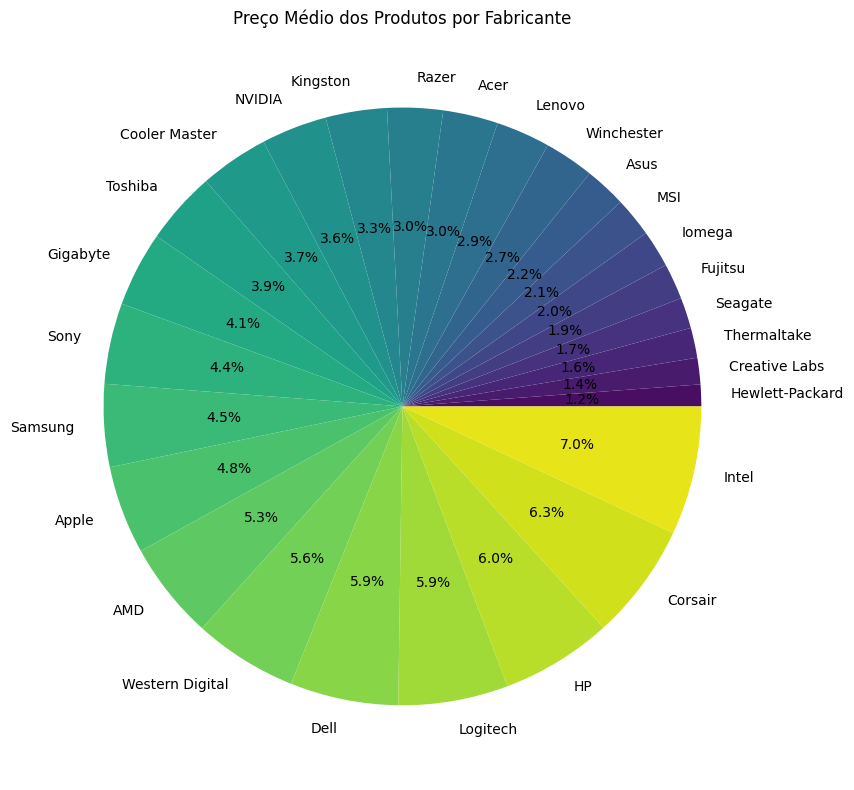

In [21]:
import matplotlib.pyplot as plt

# 2. Preço médio dos produtos por fabricante
plt.figure(figsize=(12, 8))  # Define o tamanho da figura do gráfico (largura de 12 polegadas e altura de 8 polegadas)

# Calcula o preço médio dos produtos para cada fabricante, agrupando por 'Manufacturer Name'
avg_price_per_manufacturer = combined_df.groupby('Manufacturer Name')['Price'].mean().sort_values()

# Plota um gráfico de torta (pizza) com os preços médios por fabricante
plt.pie(avg_price_per_manufacturer,  # Define os valores das fatias da pizza como os preços médios
        labels=avg_price_per_manufacturer.index,  # Define os rótulos das fatias como os nomes dos fabricantes
        autopct='%1.1f%%',  # Adiciona o percentual em cada fatia
        colors=sns.color_palette('viridis', n_colors=len(avg_price_per_manufacturer)))  # Define a paleta de cores

plt.title('Preço Médio dos Produtos por Fabricante')  # Define o título do gráfico
# Ajusta o layout do gráfico para evitar sobreposição de elementos
plt.tight_layout()
plt.savefig('preco_medio_fabricante_pizza.png')  # Salva o gráfico como uma imagem PNG
plt.show()  # Exibe o gráfico gerado
plt.close()  # Fecha o gráfico atual para liberar memória


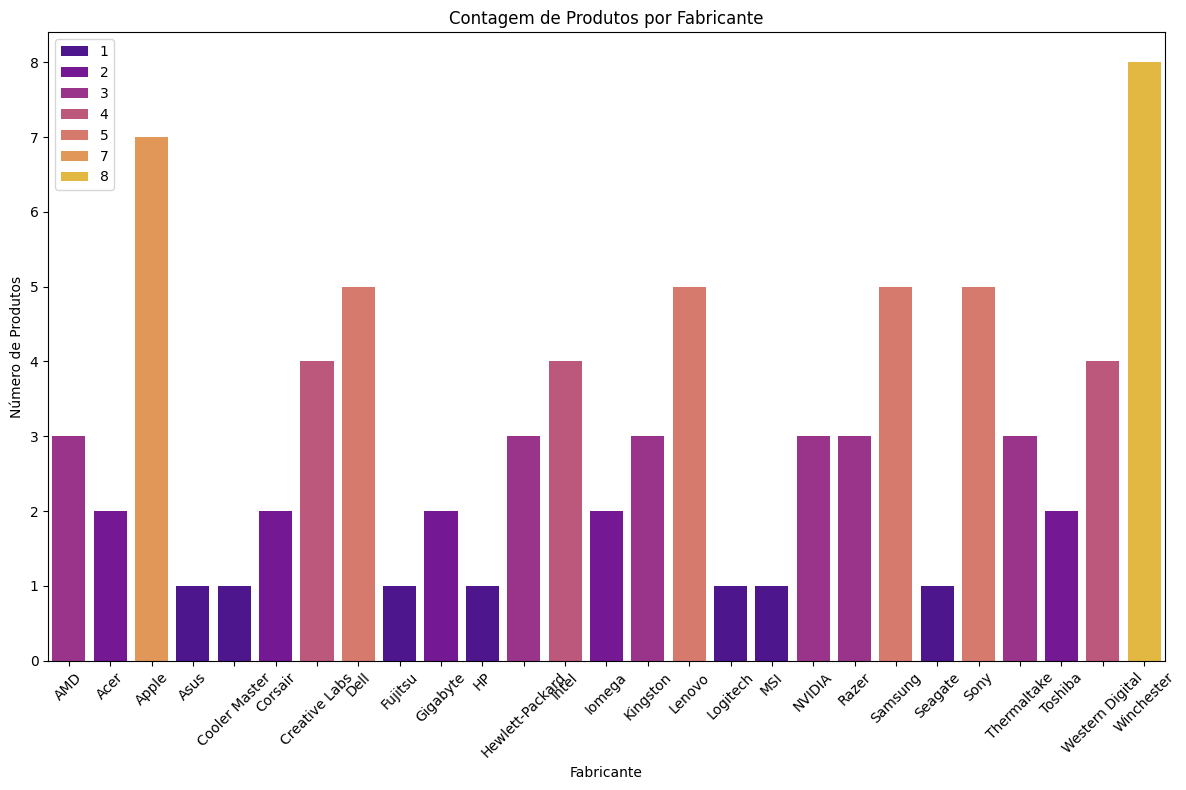

In [87]:
# Define o tamanho da figura do gráfico (largura de 12 polegadas e altura de 8 polegadas)
plt.figure(figsize=(12, 8))


# Conta o número de produtos por fabricante usando a coluna 'Manufacturer Name' e retorna uma série com fabricantes como índices e contagens como valores
#product_count_per_manufacturer = combined_df['Manufacturer Name'].value_counts() # Plota um gráfico de barras com o número de produtos por fabricante
# agrupa por nome do fabricante e retorna uma série com fabricantes como índices e contagens como valores
product_count_per_manufacturer = combined_df['Manufacturer Name'].value_counts().sort_index()
sns.barplot(x=product_count_per_manufacturer.index, # x: Define os rótulos do eixo X como os fabricantes
            y=product_count_per_manufacturer.values, # y: Define os valores do eixo Y como o número de produtos por fabricante
            hue=product_count_per_manufacturer.values, # hue: Adiciona uma dimensão adicional para a coloração das barras; neste caso, usa os valores da contagem dos produtos, mas não afeta a coloração
            palette=sns.color_palette('plasma', n_colors=7)) # palette: Define a paleta de cores para o gráfico de barras usando a paleta 'plasma' e especifica que a paleta deve ter 3 cores


# Define o título do gráfico
plt.title('Contagem de Produtos por Fabricante')

# Define o rótulo do eixo X
plt.xlabel('Fabricante')

# Define o rótulo do eixo Y
plt.ylabel('Número de Produtos')

# Rotaciona os rótulos do eixo X em 45 graus para melhor legibilidade
plt.xticks(rotation=45)
# Ajusta o layout do gráfico para evitar sobreposição de elementos
plt.tight_layout()
# Salva o gráfico como uma imagem PNG
plt.savefig('contagem_produtos_fabricante.png')
# Exibe o gráfico gerado
plt.show()
# Fecha o gráfico atual para liberar memória
plt.close()



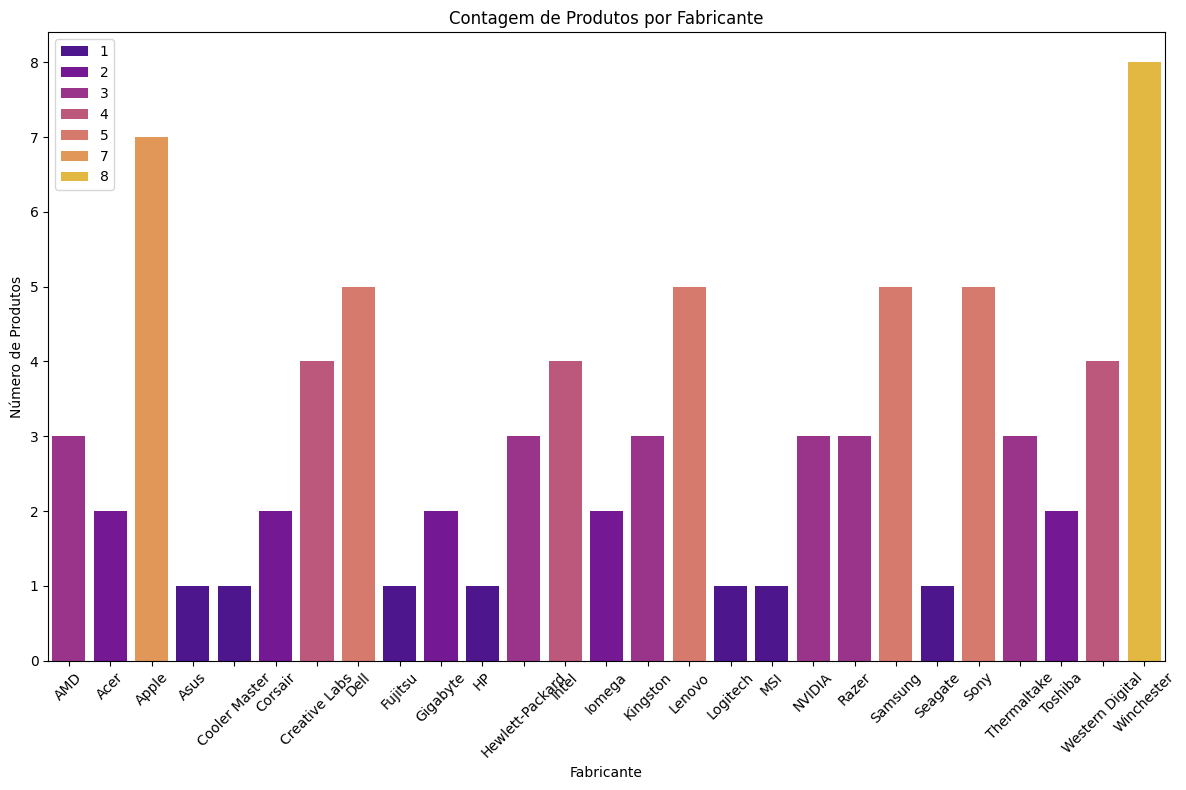

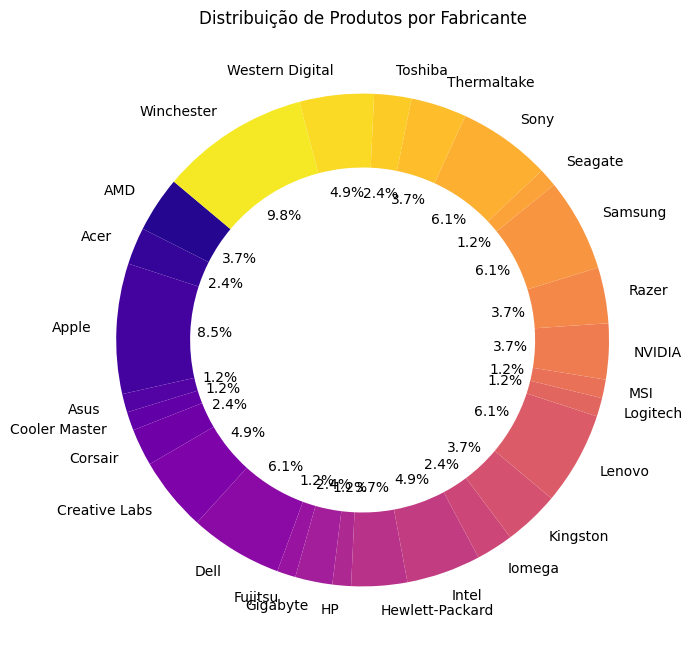

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define o tamanho da figura do gráfico (largura de 12 polegadas e altura de 8 polegadas)
plt.figure(figsize=(12, 8))

# Conta o número de produtos por fabricante usando a coluna 'Manufacturer Name' e retorna uma série com fabricantes como índices e contagens como valores
product_count_per_manufacturer = combined_df['Manufacturer Name'].value_counts().sort_index()

# Plota um gráfico de barras com o número de produtos por fabricante
sns.barplot(x=product_count_per_manufacturer.index, # x: Define os rótulos do eixo X como os fabricantes
            y=product_count_per_manufacturer.values, # y: Define os valores do eixo Y como o número de produtos por fabricante
            hue=product_count_per_manufacturer.values, # hue: Adiciona uma dimensão adicional para a coloração das barras
            palette=sns.color_palette('plasma', n_colors=7)) # palette: Define a paleta de cores para o gráfico de barras com o número adequado de cores

# Define o título do gráfico
plt.title('Contagem de Produtos por Fabricante')

# Define o rótulo do eixo X
plt.xlabel('Fabricante')

# Define o rótulo do eixo Y
plt.ylabel('Número de Produtos')

# Rotaciona os rótulos do eixo X em 45 graus para melhor legibilidade
plt.xticks(rotation=45)

# Ajusta o layout do gráfico para evitar sobreposição de elementos
plt.tight_layout()

# Salva o gráfico como uma imagem PNG
plt.savefig('contagem_produtos_fabricante.png')

# Exibe o gráfico gerado
plt.show()

# Fecha o gráfico atual para liberar memória
plt.close()

# Cria um gráfico de donuts (gráfico de rosca) para a contagem de produtos por fabricante
plt.figure(figsize=(8, 8))
plt.pie(product_count_per_manufacturer,
        labels=product_count_per_manufacturer.index,
        colors=sns.color_palette('plasma', n_colors=len(product_count_per_manufacturer)),
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops=dict(width=0.3))  # Define a largura do donut para criar o efeito de rosca

# Define o título do gráfico de donuts
plt.title('Distribuição de Produtos por Fabricante')

# Salva o gráfico de donuts como uma imagem PNG
plt.savefig('distribuicao_produtos_donut.png')

# Exibe o gráfico gerado
plt.show()

# Fecha o gráfico atual para liberar memória
plt.close()


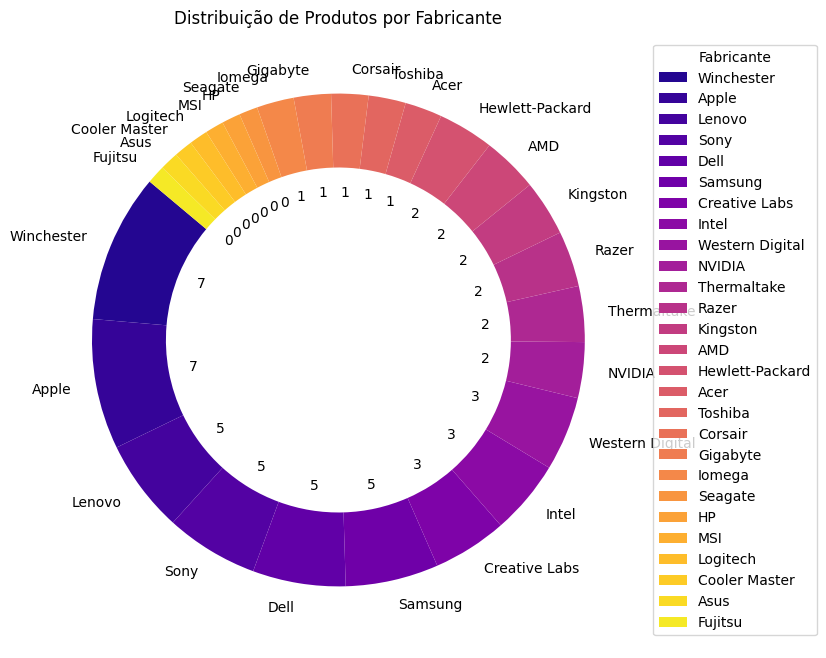

In [107]:


# Conta o número de produtos por fabricante após a limpeza dos dados
product_count_per_manufacturer = combined_df['Manufacturer Name'].value_counts()

# Cria um gráfico de donuts (gráfico de rosca) para a contagem de produtos por fabricante
plt.figure(figsize=(8, 8))

# Plota o gráfico de rosca
wedges, texts, autotexts = plt.pie(product_count_per_manufacturer,
                                   labels=product_count_per_manufacturer.index,
                                   colors=sns.color_palette('plasma', n_colors=len(product_count_per_manufacturer)),
                                   #autopct='%1.1f%%',  # Mostra as porcentagens
                                   autopct=lambda pct: func(pct, product_count_per_manufacturer),  # Exibe o número de produtos
                                   startangle=140,
                                   wedgeprops=dict(width=0.3))  # Define a largura do donut para criar o efeito de rosca

# Remove as seções onde a contagem de produtos é zero (ou muito baixa) se houver
if len(wedges) > 0:
    for wedge, count in zip(wedges, product_count_per_manufacturer):
        if count == 0:
            wedge.set_visible(False)

# Define o título do gráfico de donuts
plt.title('Distribuição de Produtos por Fabricante')

# Adiciona a legenda fora do gráfico para os fabricantes
plt.legend(wedges, product_count_per_manufacturer.index, title="Fabricante", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Salva o gráfico de donuts como uma imagem PNG
plt.savefig('distribuicao_produtos_donut_limpo.png')

# Exibe o gráfico gerado
plt.show()

# Fecha o gráfico atual para liberar memória
plt.close()



In [28]:
print(combined_df.shape)  # Mostra o número de linhas e colunas

(82, 8)


In [29]:
# Salvando o DataFrame combinado em um arquivo CSV
combined_df.to_csv('dados_combinados.csv', index=False)

# Salvando o DataFrame combinado em um arquivo Excel
combined_df.to_excel('dados_combinados.xlsx', index=False)




In [30]:
# Salvando os dados em um arquivo Excel
with pd.ExcelWriter('dados_completos.xlsx') as writer:
    combined_df.to_excel(writer, sheet_name='Dados', index=False)

In [31]:
from openpyxl import load_workbook
from openpyxl.drawing.image import Image

# Caminho das imagens
imagens = [
    'distribuicao_precos.png',
    'preco_medio_fabricante.png',  # Adicione mais caminhos de imagens
    'contagem_produtos_fabricante.png',

]

# Carregar o arquivo Excel existente
workbook = load_workbook('dados_completos.xlsx')

# Adicionar uma nova aba para gráficos
worksheet = workbook.create_sheet(title='Gráficos')

# Adicionar imagens verticalmente em uma única coluna
for i, imagem in enumerate(imagens):
    img = Image(imagem)
    cell = f'A{i * 30 + 1}'  # Ajuste o espaçamento vertical conforme necessário
    worksheet.add_image(img, cell)

# Salvar o arquivo Excel com as imagens
workbook.save('dados_completos_com_graficos.xlsx')  #tem que se aperfecôar porque fica sem medida exata nos graficos



FileNotFoundError: [Errno 2] No such file or directory: 'preco_medio_fabricante.png'

exemplo para gerar codigos random en caso de precisar aumentar la db, deve ser trabalhado ainda

In [ ]:
# # Gerar dados aleatórios
# num_new_entries = 10  # Número de novas entradas que você deseja adicionar

# # Gerar IDs únicos para os novos produtos
# new_ids = np.arange(combined_df['Product_Code'].max() + 1, combined_df['Product_Code'].max() + num_new_entries + 1)

# # Gerar nomes aleatórios
# new_names = [f'Produto_{i}' for i in range(num_new_entries)]

# # Gerar preços aleatórios entre 50 e 500
# new_prices = np.random.uniform(50, 500, size=num_new_entries)

# # Gerar IDs de fabricantes aleatórios (considerando que temos 6 fabricantes)
# new_manufacturers = np.random.randint(1, 7, size=num_new_entries)

# # Criar um novo DataFrame com dados aleatórios
# new_products_df = pd.DataFrame({
#     'Product_Code': new_ids,
#     'Name': new_names,
#     'Price': new_prices,
#     'Manufacturer': new_manufacturers
# })

# # Concatenar o DataFrame existente com o novo DataFrame
# combined_df = pd.concat([combined_df, new_products_df], ignore_index=True)



In [81]:
from google.colab import drive
drive.mount('/content/')

MessageError: Error: credential propagation was unsuccessful